<a href="https://colab.research.google.com/github/hoonzi-s/hongong_MLDL/blob/main/04-2.%20%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# SGDClassifier
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [56]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [57]:
from sklearn.model_selection import train_test_split as tts
train_input, test_input, train_target, test_target = tts(fish_input, fish_target, random_state = 42)

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [59]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [60]:
# 모델을 이어서 훈련하는 partial_fit 메소드. 호출할 때마다 1 에포크씩만 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [61]:
# 과대적합이 시작하기 전에 훈련을 멈추는 조기 종료 타이밍 잡기
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [62]:
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

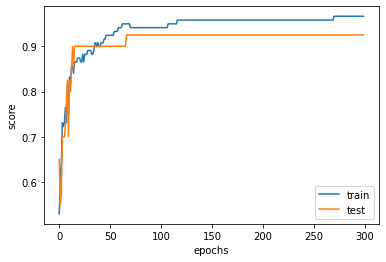

In [64]:
import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.xlabel('epochs')
plt.ylabel('score')
plt.legend()
plt.show()

In [65]:
# 100번만 훈련하면 될 것 같음
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
